Initial exploration and data preprocessing

<Axes: >

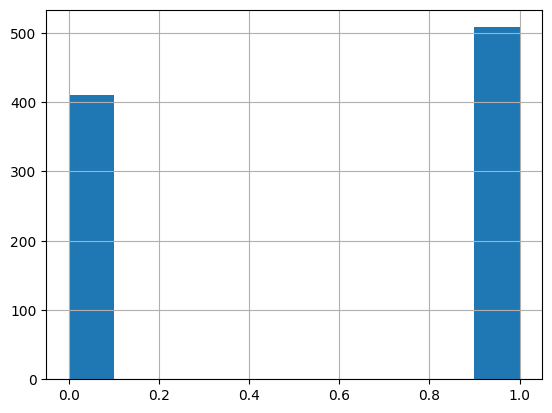

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
df_heart = pd.read_csv('heart_dataset.csv')
df_heart['HeartDisease'].hist()

In [2]:
# explore training data
print('data types')
display(df_heart.dtypes)

print('Do we have NaN in our dataset?')
display(df_heart.isnull().any())

# print("Missing value counts:")
# display(df_heart.isnull().sum())

# print("\nMissing value percentages:")
# display(df_heart.isnull().sum() / len(df_heart) * 100)

data types


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Do we have NaN in our dataset?


Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [3]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Check for duplicates, this adds a new column to the dataset
df_heart["is_duplicate"]= df_heart.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df_heart)}")
print(f"#duplicated= {len(df_heart[df_heart['is_duplicate']==True])}")

#total= 918
#duplicated= 0


/var/folders/3t/d32ms60j5sv4qjj7r_2x_6sr0000gn/T/ipykernel_40124/3847782592.py:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = _df['HeartDisease'].astype('category').cat.codes.ravel()


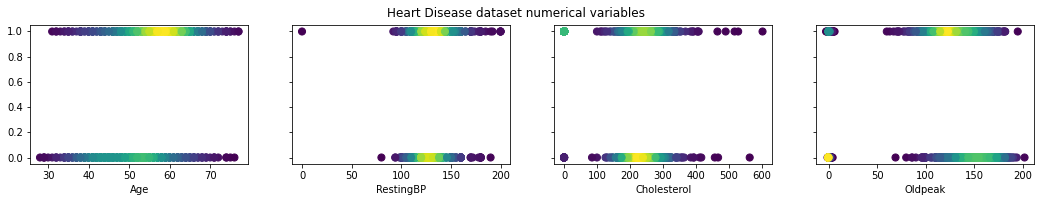

In [5]:
# Kernel density estimation to color the density
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Plotting function
def plot_bc_numericals(_df):
    fig, axs = plt.subplots(1, 4, figsize=(18, 2.5), sharey=True, dpi=72)
    y = _df['HeartDisease'].astype('category').cat.codes.ravel()
    xy = np.vstack([_df['Age'],y]); z = gaussian_kde(xy)(xy)
    axs[0].scatter(_df['Age'], _df['HeartDisease'], c=z, s=50, edgecolor=None)
    axs[0].set_xlabel('Age')
    xy = np.vstack([_df['RestingBP'],y]); z = gaussian_kde(xy)(xy)
    axs[1].scatter(_df['RestingBP'], _df['HeartDisease'], c=z, s=50, edgecolor=None)
    axs[1].set_xlabel('RestingBP')
    xy = np.vstack([_df['Cholesterol'],y]); z = gaussian_kde(xy)(xy)
    axs[2].scatter(_df['Cholesterol'], _df['HeartDisease'], c=z, s=50, edgecolor=None)
    axs[2].set_xlabel('Cholesterol')
    xy = np.vstack([_df['FastingBS'],y]); z = gaussian_kde(xy)(xy)
    axs[3].scatter(_df['FastingBS'], _df['HeartDisease'], c=z, s=50, edgecolor=None)
    axs[3].set_xlabel('FastingBS')
    xy = np.vstack([_df['MaxHR'],y]); z = gaussian_kde(xy)(xy)
    axs[3].scatter(_df['MaxHR'], _df['HeartDisease'], c=z, s=50, edgecolor=None)
    axs[3].set_xlabel('MaxHR')
    xy = np.vstack([_df['Oldpeak'],y]); z = gaussian_kde(xy)(xy)
    axs[3].scatter(_df['Oldpeak'], _df['HeartDisease'], c=z, s=50, edgecolor=None)
    axs[3].set_xlabel('Oldpeak')
    fig.suptitle('Heart Disease dataset numerical variables')
    plt.show()

plot_bc_numericals(df_heart)

In [6]:
nominal_features = df_heart.select_dtypes(include='object')

# Loop through object columns and print unique values
for col in nominal_features:
    unique_values = df_heart[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'Sex': ['M' 'F']
Unique values in 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Unique values in 'RestingECG': ['Normal' 'ST' 'LVH']
Unique values in 'ExerciseAngina': ['N' 'Y']
Unique values in 'ST_Slope': ['Up' 'Flat' 'Down']


In [7]:
categorical_features = ['Sex', 'ChestPainType', 'ExerciseAngina']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df_heart[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features), index=df_heart.index)

In [8]:
encoded_cat_df.head

<bound method NDFrame.head of      Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0    1.0                0.0                1.0                0.0   
1      1.0    0.0                0.0                0.0                1.0   
2      0.0    1.0                0.0                1.0                0.0   
3      1.0    0.0                1.0                0.0                0.0   
4      0.0    1.0                0.0                0.0                1.0   
..     ...    ...                ...                ...                ...   
913    0.0    1.0                0.0                0.0                0.0   
914    0.0    1.0                1.0                0.0                0.0   
915    0.0    1.0                1.0                0.0                0.0   
916    1.0    0.0                0.0                1.0                0.0   
917    0.0    1.0                0.0                0.0                1.0   

     ChestPainType_TA  ExerciseAn

In [9]:
ordinal_features = ['RestingECG', 'ST_Slope']
ord_encoder = OrdinalEncoder(categories=[
    ['Normal', 'ST', 'LVH'],  # Order for RestingECG
    ['Up', 'Flat', 'Down']     # Order for ST_Slope
])
ordinal_features_encoded = ord_encoder.fit_transform(df_heart[ordinal_features])
encoded_ord_df = pd.DataFrame(
    ordinal_features_encoded,
    columns=ordinal_features,
    index=df_heart.index
    )
encoded_ord_df.head()

,RestingECG,ST_Slope
0,0.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0


In [10]:
# Combine with numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak' ]
numerical_data = df_heart[numerical_features]

# Normalize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_data)
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features, index=df_heart.index)
scaled_numerical_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432


In [11]:
target = df_heart[['HeartDisease']]

df_preprocessed = pd.concat([
    scaled_numerical_df,
    encoded_ord_df,
    encoded_cat_df,
    target
], axis=1)

print(df_preprocessed.shape)
df_preprocessed.head()

(918, 17)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG,ST_Slope,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [12]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


Question 1: Report 10-fold cross-validation (“CV”) performances of the following types of
classifiers, using default parameters:
• GaussianNB
• Linear SVC (use SVC(kernel='linear', probability=True))
• MLPClassifier
• DecisionTreeClassifier
Now report the RandomForestClassifier performance too. 

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
X = df_preprocessed.drop('HeartDisease', axis=1)
y = df_preprocessed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Explicitly define 10-fold CV
kfold = KFold(n_splits=10, shuffle=True, random_state=42) #Why 42? It's "The Answer to the Ultimate Question of Life, the Universe, and Everything"

# Define classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'Linear SVC': SVC(kernel='linear', probability=True),
    'MLPClassifier': MLPClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [14]:
# Perform 10-fold CV for each classifier

# comment out warnings.fiterwarnings()
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = {
        'scores': scores,
        'mean': scores.mean(),
        'std': scores.std()
    }
    print(f"\n{name}:")
    print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"  Individual fold scores: {scores}")




GaussianNB:
  Accuracy: 0.8378 (+/- 0.0525)
  Individual fold scores: [0.89189189 0.89189189 0.7972973  0.82432432 0.90410959 0.79452055
 0.82191781 0.90410959 0.79452055 0.75342466]



Linear SVC:
  Accuracy: 0.8542 (+/- 0.0378)
  Individual fold scores: [0.89189189 0.91891892 0.7972973  0.7972973  0.8630137  0.83561644
 0.8630137  0.89041096 0.84931507 0.83561644]

MLPClassifier:
  Accuracy: 0.8446 (+/- 0.0421)
  Individual fold scores: [0.91891892 0.90540541 0.7972973  0.83783784 0.8630137  0.82191781
 0.8630137  0.84931507 0.79452055 0.79452055]

DecisionTreeClassifier:
  Accuracy: 0.7954 (+/- 0.0677)
  Individual fold scores: [0.90540541 0.89189189 0.81081081 0.75675676 0.75342466 0.7260274
 0.71232877 0.87671233 0.76712329 0.75342466]


Observing the warnings for the MLPclassifer, that the default parameter for maximum convergence is set to 200 iterations and is not enough iterations to reach convergence. The model still trains and produces results - it just has not reached optimal convergence. Neural networks can take many iterations; I would consider increasing the max iterations to 1000 to see if it converges. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Report performance
print(f"\nRandomForestClassifier:")
print(f"  Training Accuracy: {rf_clf.score(X_train, y_train):.4f}")


RandomForestClassifier:
  Training Accuracy: 1.0000


Question 2: Generate an ensemble of 100 classifiers for each of the four basic classifiers in Q1.
and store each ensemble as a list.

In [16]:
# Split the data
X = df_preprocessed.drop('HeartDisease', axis=1)
y = df_preprocessed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create ensembles of 100 classifiers each
print("Creating and training ensembles of 100 classifiers...\n")

# GaussianNB ensemble (default parameters)
gaussianNB_ensemble = []
for i in range(100):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    gaussianNB_ensemble.append(clf)

# Linear SVC ensemble (default parameters)
linear_svc_ensemble = []
for i in range(100):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    linear_svc_ensemble.append(clf)

# MLPClassifier ensemble (weakened parameters)
mlp_ensemble = []
for i in range(100):
    clf = MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1)
    clf.fit(X_train, y_train)
    mlp_ensemble.append(clf)

# DecisionTreeClassifier ensemble (weakened parameters)
decision_tree_ensemble = []
for i in range(100):
    clf = DecisionTreeClassifier(max_depth=5, max_features=5)
    clf.fit(X_train, y_train)
    decision_tree_ensemble.append(clf)

Creating and training ensembles of 100 classifiers...



In [17]:
# Report performance of the FIRST classifier from each ensemble
print("Performance of the FIRST classifier in each ensemble:")
print("="*60)

ensembles = {
    'GaussianNB': gaussianNB_ensemble,
    'Linear SVC': linear_svc_ensemble,
    'MLPClassifier': mlp_ensemble,
    'DecisionTreeClassifier': decision_tree_ensemble
}

for name, ensemble in ensembles.items():
    # Get the first classifier (index 0)
    first_clf = ensemble[0]
    
    # Get accuracy
    accuracy = first_clf.score(X_train, y_train)
    
    print(f"{name:25s}: {accuracy:.4f}")

Performance of the FIRST classifier in each ensemble:
GaussianNB               : 0.8433
Linear SVC               : 0.8624
MLPClassifier            : 0.5668
DecisionTreeClassifier   : 0.8828


The neural networks performance dropping severly is not surprising given the few number of iterations.

Question 3: Write a function ensemble_fit() to receive the ensemble (i.e. one of the 4 lists from
Q2.) as an input and train it on one of the subsets (i.e. bagging) of the training data.

In [18]:
# # Define ensemble_fit function()

# import random

# def ensemble_fit(ensemble, X, y, sample_fraction=0.8):
#     n_samples = len(X)
#     sample_size = int(n_samples * sample_fraction)
    
#     # Convert to numpy arrays for easier indexing
#     X_array = X.values if hasattr(X, 'values') else X
#     y_array = y.values if hasattr(y, 'values') else y
    
#     for clf in ensemble:
#         # Random sample of row indices (with replacement for true bagging)
#         indices = random.choices(range(n_samples), k=sample_size)
        
#         # Subsample the data using these indices
#         X_subset = X_array[indices]
#         y_subset = y_array[indices]
        
#         # Train classifier on this subset
#         clf.fit(X_subset, y_subset)
    
#     return ensemble

In [19]:
import random


def ensemble_fit(ensemble, X, y, sample_fraction=0.8):
    """
    Train an ensemble using bagging with stratification to ensure both classes.
    Parameters:
    -----------
    ensemble : list
        List of untrained classifiers
    X : DataFrame or array
        Feature data
    y : Series or array
        Target labels
    sample_fraction : float
        Fraction of data to sample for each classifier (default 0.8)
    
    Returns:
    --------
    ensemble : list
        List of trained classifiers
    """
    n_samples = len(X)
    sample_size = int(n_samples * sample_fraction)
    
    # Convert to numpy arrays
    X_array = X.values if hasattr(X, 'values') else X
    y_array = y.values if hasattr(y, 'values') else y
    
    for clf in ensemble:
        # Keep sampling until we get both classes
        max_attempts = 100
        for attempt in range(max_attempts):
            # Random sample with replacement
            indices = random.choices(range(n_samples), k=sample_size)
            
            # Check if both classes are present
            y_subset = y_array[indices]
            if len(np.unique(y_subset)) > 1:
                # Both classes present, proceed with training
                X_subset = X_array[indices]
                clf.fit(X_subset, y_subset)
                break
        else:
            # If we couldn't get both classes after max_attempts, use stratified sample
            X_subset, _, y_subset, _ = train_test_split(
                X_array, y_array, 
                train_size=sample_fraction, 
                stratify=y_array,
                random_state=random.randint(0, 10000)
            )
            clf.fit(X_subset, y_subset)
    
    return ensemble


In [20]:


# Split the data
X = df_preprocessed.drop('HeartDisease', axis=1)
y = df_preprocessed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create NEW untrained ensembles
gaussianNB_ensemble = [GaussianNB() for _ in range(100)]
linear_svc_ensemble = [SVC(kernel='linear', probability=True) for _ in range(100)]
mlp_ensemble = [MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1) for _ in range(100)]
decision_tree_ensemble = [DecisionTreeClassifier(max_depth=5, max_features=5) for _ in range(100)]

# Train each ensemble using bagging
gaussianNB_ensemble = ensemble_fit(gaussianNB_ensemble, X_train, y_train)
linear_svc_ensemble = ensemble_fit(linear_svc_ensemble, X_train, y_train)
mlp_ensemble = ensemble_fit(mlp_ensemble, X_train, y_train)
decision_tree_ensemble = ensemble_fit(decision_tree_ensemble, X_train, y_train)

print("All ensembles trained with bagging")

All ensembles trained with bagging


Question 4: Write a function ensemble_predict() to receive the trained ensemble (i.e. one of the lists from Q3.) as input and output a prediction for a given observation. Since each sub-classifier will have its own prediction, use a voting scheme on the returned predictions.

In [21]:
def ensemble_predict(ensemble, X, use_proba=False):
    """
    Make predictions using an ensemble with voting.
    
    Parameters:
    -----------
    ensemble : list
        List of trained classifiers
    X : DataFrame or array
        Feature data to predict (can be single observation or multiple)
    use_proba : bool
        If True, use predict_proba
        If False, use predict for majority voting
    
    Returns:
    --------
    predictions : array
        Predicted class labels
    """
    
    # Convert to numpy array if needed
    X_array = X.values if hasattr(X, 'values') else X
    
    # Handle single observation vs multiple observations
    if X_array.ndim == 1:
        X_array = X_array.reshape(1, -1)
    
    n_samples = X_array.shape[0]
    n_classifiers = len(ensemble)
    
    if use_proba:
        # Voting by averaging the probabilities of predictions (Prediction Probabilities)
        all_probas = np.zeros((n_samples, 2))  # Assuming binary classification
        
        for clf in ensemble:
            probas = clf.predict_proba(X_array)
            all_probas += probas
        
        # Average probabilities
        avg_probas = all_probas / n_classifiers
        
        # Get class with highest average probability
        predictions = np.argmax(avg_probas, axis=1)
        
    else:
        # Voting by counting votes for each class (Majority Voting)
        votes = np.zeros((n_samples, 2))  # Assuming binary classification (0 and 1)
        
        for clf in ensemble:
            preds = clf.predict(X_array)
            for i, pred in enumerate(preds):
                votes[i, pred] += 1
        
        # Get class with most votes using argmax (not just max)
        predictions = np.argmax(votes, axis=1)
    
    return predictions

In [22]:

ensemble_list = [gaussianNB_ensemble, linear_svc_ensemble, mlp_ensemble, decision_tree_ensemble]
ensemble_name = ['GaussianNB Ensemble', 'Linear SVC Ensemble', 'MLP Ensemble', 'Decision Tree Ensemble']
# Testing using testing data set. 

for ensemble, name in zip(ensemble_list, ensemble_name):
    # Predictions using Majority Voting (predict)
    majority_vote_predictions = ensemble_predict(ensemble, X_test, use_proba=False)
    majority_vote_accuracy = np.mean(majority_vote_predictions == y_test)

    # Predictions using Prediction Probabilities (predict_proba)
    avg_pro_predictions = ensemble_predict(ensemble, X_test, use_proba=True)
    avg_pro_accuracy = np.mean(avg_pro_predictions == y_test)
    print(f"{name} Prediction Comparison:")
    print("="*50)
    print(f"Majority Vote Voting (predict): {majority_vote_accuracy:.4f}")
    print(f"Prediction Probabilities Voting (predict_proba): {avg_pro_accuracy:.4f}")
    print(f"Improvement:{avg_pro_accuracy - majority_vote_accuracy:.4f}\n")

GaussianNB Ensemble Prediction Comparison:
Majority Vote Voting (predict): 0.8478
Prediction Probabilities Voting (predict_proba): 0.8478
Improvement:0.0000

Linear SVC Ensemble Prediction Comparison:
Majority Vote Voting (predict): 0.8587
Prediction Probabilities Voting (predict_proba): 0.8587
Improvement:0.0000

MLP Ensemble Prediction Comparison:
Majority Vote Voting (predict): 0.7717
Prediction Probabilities Voting (predict_proba): 0.8098
Improvement:0.0380

Decision Tree Ensemble Prediction Comparison:
Majority Vote Voting (predict): 0.8750
Prediction Probabilities Voting (predict_proba): 0.8913
Improvement:0.0163



Interesting, prediction probabilities does not always outperform majority voting. 

Question 5: Report 10-fold CV performances of the ensembles with a subsample ratio of 0.2.
Compare to a regular decision tree (same subsample ratio). Now repeat these for a
subsample ratio of 0.05.

In [23]:
def evaluate_ensemble_cv(classifier_type, ensemble_size, subsample_ratio, X, y, n_splits=10):
    """
    Evaluate ensemble performance using cross-validation with bagging.
    
    Parameters:
    -----------
    classifier_type : sklearn classifier class or dict with params
        The type of classifier to use in the ensemble
    ensemble_size : int
        Number of classifiers in ensemble
    subsample_ratio : float
        Fraction of data to sample for each classifier
    """
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Create ensemble based on classifier type
        if classifier_type == 'DecisionTree':
            ensemble = [DecisionTreeClassifier(max_depth=5, max_features=5) 
                       for _ in range(ensemble_size)]
        elif classifier_type == 'MLP':
            ensemble = [MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1)
                       for _ in range(ensemble_size)]
        elif classifier_type == 'GaussianNB':
            ensemble = [GaussianNB() for _ in range(ensemble_size)]
        elif classifier_type == 'LinearSVC':
            ensemble = [SVC(kernel='linear', probability=True) for _ in range(ensemble_size)]
        
        # Train with bagging
        ensemble = ensemble_fit(ensemble, X_train, y_train, sample_fraction=subsample_ratio)
        
        # Predict
        predictions = ensemble_predict(ensemble, X_val, use_proba=True)
        accuracy = np.mean(predictions == y_val)
        scores.append(accuracy)
    
    return np.array(scores)


In [24]:
def evaluate_single_tree_cv(subsample_ratio, X, y, n_splits=10):
    """
    Evaluate single decision tree with subsampling using cross-validation.
    Parameters:
    -----------
    subsample_ratio : float
        Fraction of training data to use
    X, y : features and labels
    n_splits : int
        Number of CV folds
    
    Returns:
    --------
    scores : array of accuracy scores for each fold
    """
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []  # Initialize as list, not numpy array
    
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Subsample the training data
        n_samples = len(X_train)
        sample_size = int(n_samples * subsample_ratio)
        indices = random.sample(range(n_samples), sample_size)
        
        X_train_sub = X_train.iloc[indices]
        y_train_sub = y_train.iloc[indices]
        
        # Train single tree on subsample
        tree = DecisionTreeClassifier(max_depth=5, max_features=5)
        tree.fit(X_train_sub, y_train_sub)
        
        # Predict on validation set
        accuracy = tree.score(X_val, y_val)
        scores.append(accuracy)
    
    return np.array(scores)

In [25]:
# Evaluate all 4 ensemble types
X = df_preprocessed.drop('HeartDisease', axis=1)
y = df_preprocessed['HeartDisease']

classifier_types = ['GaussianNB', 'LinearSVC', 'MLP', 'DecisionTree']

for ratio in [0.2, 0.05]:
    print(f"\nSubsample Ratio = {ratio}")
    print("="*70)
    
    # Single decision tree baseline
    single_tree_scores = evaluate_single_tree_cv(ratio, X, y)
    print(f"Single Decision Tree:  {single_tree_scores.mean():.4f} (+/- {single_tree_scores.std():.4f})")
    print()
    
    # All ensemble types
    for clf_type in classifier_types:
        ensemble_scores = evaluate_ensemble_cv(clf_type, 100, ratio, X, y)
        improvement = ensemble_scores.mean() - single_tree_scores.mean()
        print(f"{clf_type:20s}: {ensemble_scores.mean():.4f} (+/- {ensemble_scores.std():.4f}) [+{improvement:.4f}]")


Subsample Ratio = 0.2
Single Decision Tree:  0.7833 (+/- 0.0496)



GaussianNB          : 0.8409 (+/- 0.0485) [+0.0577]
LinearSVC           : 0.8562 (+/- 0.0444) [+0.0729]
MLP                 : 0.5633 (+/- 0.0501) [+-0.2200]
DecisionTree        : 0.8649 (+/- 0.0430) [+0.0816]

Subsample Ratio = 0.05
Single Decision Tree:  0.7734 (+/- 0.0664)

GaussianNB          : 0.8224 (+/- 0.0396) [+0.0490]
LinearSVC           : 0.8508 (+/- 0.0397) [+0.0774]
MLP                 : 0.5426 (+/- 0.0650) [+-0.2307]
DecisionTree        : 0.8638 (+/- 0.0353) [+0.0905]


Question 6: Report the 10-fold CV performances of the ensembles for the training subsample
ratios of (0.005, 0.01, 0.03, 0.05, 0.1, 0.2). Now train regular versions of those 4 classifiers
and report their performance.

In [26]:
# Define subsample ratios to test
subsample_ratios = [0.005, 0.01, 0.03, 0.05, 0.1, 0.2]

# Classifier configurations
weak_classifiers = {
    'GaussianNB': lambda: GaussianNB(),
    'LinearSVC': lambda: SVC(kernel='linear', probability=True),
    'MLP': lambda: MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1),
    'DecisionTree': lambda: DecisionTreeClassifier(max_depth=5, max_features=5)
}

# Regular (non-weak) classifiers
regular_classifiers = {
    'GaussianNB': lambda: GaussianNB(),
    'LinearSVC': lambda: SVC(kernel='linear', probability=True),
    'MLP': lambda: MLPClassifier(),  # Default parameters
    'DecisionTree': lambda: DecisionTreeClassifier()  # Default parameters
}

In [27]:
def evaluate_classifier_cv(classifier_creator, ensemble_size, subsample_ratio, X, y, n_splits=10):
    """
    Evaluate classifier(s) using cross-validation with bagging.
    Works for both ensembles (size > 1) and single classifiers (size = 1).
    """
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Create ensemble (or single classifier if ensemble_size=1)
        ensemble = [classifier_creator() for _ in range(ensemble_size)]
        
        # Train with bagging
        ensemble = ensemble_fit(ensemble, X_train, y_train, sample_fraction=subsample_ratio)
        
        # Predict
        predictions = ensemble_predict(ensemble, X_val, use_proba=True)
        accuracy = np.mean(predictions == y_val)
        scores.append(accuracy)
    
    return np.array(scores)

In [28]:
# Store results
ensemble_results = {name: [] for name in weak_classifiers.keys()}
regular_results = {name: [] for name in regular_classifiers.keys()}

print("Evaluating Ensembles and Regular Classifiers...")
print("="*70)

# Evaluate for each subsample ratio
for ratio in subsample_ratios:
    print(f"\nSubsample Ratio = {ratio}")
    print("-"*70)
    
    # Evaluate ensembles (100 weak classifiers)
    for name, clf_creator in weak_classifiers.items():
        scores = evaluate_classifier_cv(clf_creator, 100, ratio, X, y)
        ensemble_results[name].append(scores.mean())
        print(f"Ensemble {name:15s}: {scores.mean():.4f} (+/- {scores.std():.4f})")
    
    print()
    
    # Evaluate regular classifiers (ensemble of 1)
    for name, clf_creator in regular_classifiers.items():
        scores = evaluate_classifier_cv(clf_creator, 1, ratio, X, y)
        regular_results[name].append(scores.mean())
        print(f"Regular  {name:15s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Summary table
print("\n" + "="*70)
print("SUMMARY: Mean Accuracy across Subsample Ratios")
print("="*70)
print(f"{'Classifier':<20s} {'Type':<10s}", end='')
for ratio in subsample_ratios:
    print(f"{ratio:>8.3f}", end='')
print()
print("-"*70)

for name in weak_classifiers.keys():
    # Ensemble results
    print(f"{name:<20s} {'Ensemble':<10s}", end='')
    for acc in ensemble_results[name]:
        print(f"{acc:>8.4f}", end='')
    print()
    
    # Regular results
    print(f"{name:<20s} {'Regular':<10s}", end='')
    for acc in regular_results[name]:
        print(f"{acc:>8.4f}", end='')
    print()
    print()

Evaluating Ensembles and Regular Classifiers...

Subsample Ratio = 0.005
----------------------------------------------------------------------
Ensemble GaussianNB     : 0.8160 (+/- 0.0386)
Ensemble LinearSVC      : 0.2938 (+/- 0.1464)
Ensemble MLP            : 0.5011 (+/- 0.0490)
Ensemble DecisionTree   : 0.8257 (+/- 0.0467)

Regular  GaussianNB     : 0.4880 (+/- 0.0542)
Regular  LinearSVC      : 0.4812 (+/- 0.1329)
Regular  MLP            : 0.7341 (+/- 0.0919)
Regular  DecisionTree   : 0.5927 (+/- 0.1509)

Subsample Ratio = 0.01
----------------------------------------------------------------------
Ensemble GaussianNB     : 0.8006 (+/- 0.0364)
Ensemble LinearSVC      : 0.8050 (+/- 0.0545)
Ensemble MLP            : 0.4989 (+/- 0.0639)
Ensemble DecisionTree   : 0.8410 (+/- 0.0363)

Regular  GaussianNB     : 0.7343 (+/- 0.1032)
Regular  LinearSVC      : 0.6460 (+/- 0.1236)
Regular  MLP            : 0.7177 (+/- 0.1183)
Regular  DecisionTree   : 0.7046 (+/- 0.1105)

Subsample Ratio = 0.03

One observation in my code is that very small subsample ratios can select a group of random samples that only have one class. Had to edit the ensemble_fit() function to ensure both classes are represented in the training data using stratificaion. I think that is a best practice. However I expect with a large enough ensemble stratification is not required.  I commented out that cell but left it available for reference. 

Question 7: For each of the 4 types of classifier, plot the performances of the ensemble at the
different subsample ratios and the performances of the regular classifier at the different
subsample ratios on the same plot. Thus, you should have 4 plots, one for each type of
classifier.

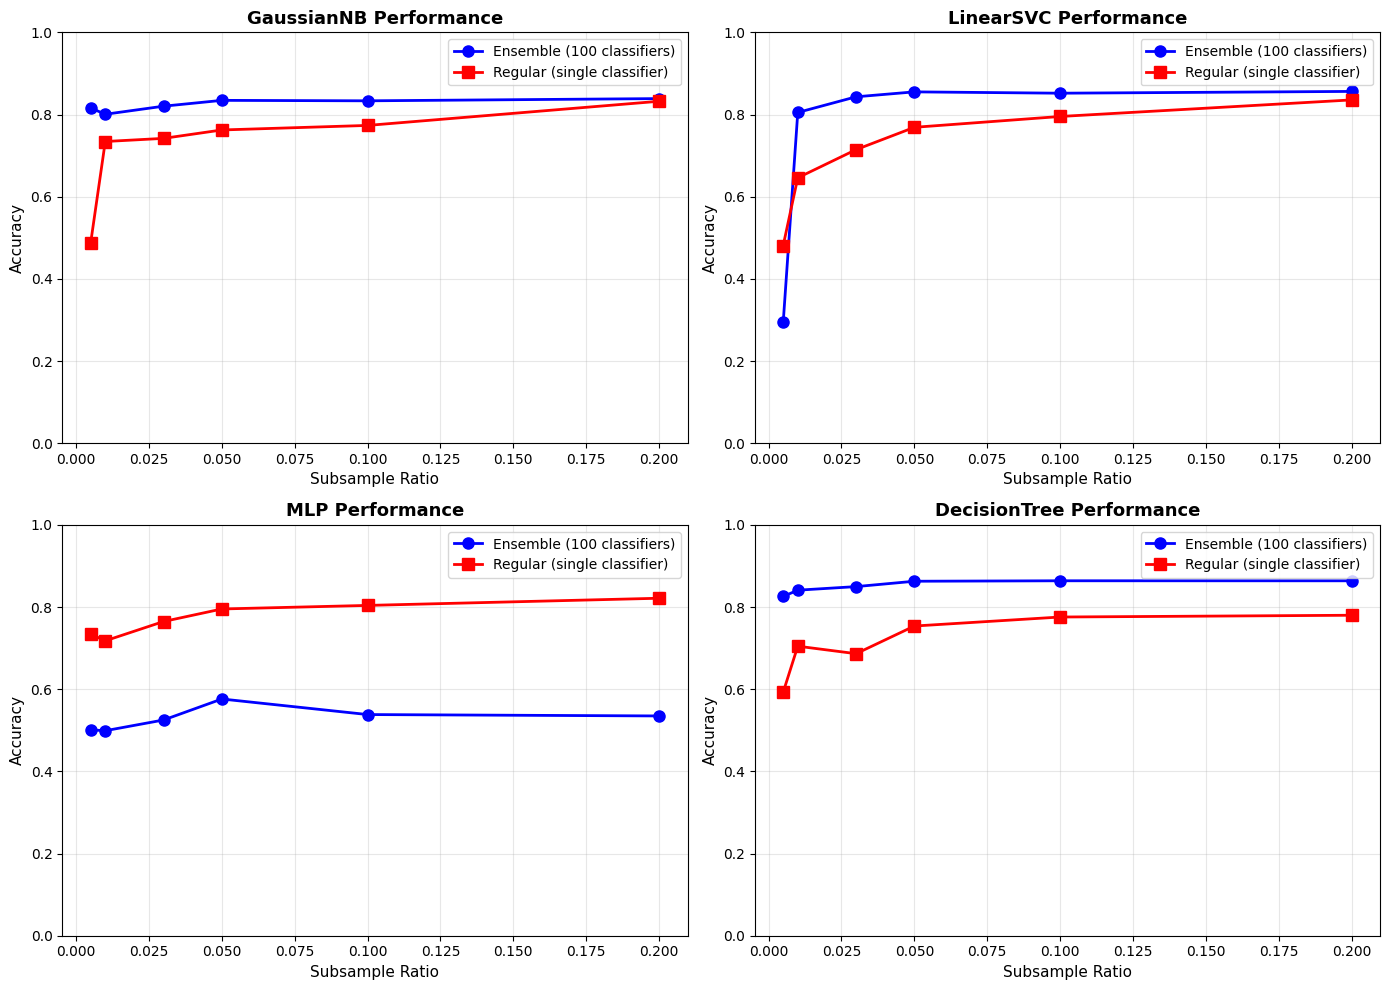

In [29]:
# Create 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

classifier_names = list(weak_classifiers.keys())

for idx, name in enumerate(classifier_names):
    ax = axes[idx]
    
    # Plot ensemble performance
    ax.plot(subsample_ratios, ensemble_results[name], 
            marker='o', linewidth=2, markersize=8,
            color='blue', label='Ensemble (100 classifiers)')
    
    # Plot regular classifier performance
    ax.plot(subsample_ratios, regular_results[name], 
            marker='s', linewidth=2, markersize=8,
            color='red', label='Regular (single classifier)')
    
    # Formatting
    ax.set_xlabel('Subsample Ratio', fontsize=11)
    ax.set_ylabel('Accuracy', fontsize=11)
    ax.set_title(f'{name} Performance', fontsize=13, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1])  # Accuracy ranges from 0 to 1

plt.tight_layout()
plt.savefig('ensemble_vs_regular_performance.png', dpi=300, bbox_inches='tight')
plt.show()

Detailed Observations Report:
=======================================
1. Overall Ensemble Performance
* Ensembles consistently outperform single classifiers, especially at lower subsample ratios
* DecisionTree ensembles achieved the highest accuracy (0.8638 - 0.8638 at ratios 0.1 - 0.2)
* The ensemble advantage is most pronounced when base classifiers are weak (trained on smaller subsets)

2. Effect of Subsample Ratio
* Very small subsample ratios (0.005) can result in single-class samples, requiring stratification to ensure both classes are present
* As subsample ratio increases, the gap between ensemble and regular classifiers narrows
* Regular classifiers show dramatic improvement as subsample ratio increases (e.g., GaussianNB: 0.488 → 0.832, LinearSVC: 0.481 → 0.836)
* Ensembles maintain more stable performance across all ratios

3. Voting Scheme Comparison (Question 4)
* predict_proba doesn't always outperform majority vote
* A previous run showed DecisionTree having the largest improvement with predict_proba (+0.0217); this runs shows MLP with largest improvement at (+0.0380)
* GaussianNB and LinearSVC showed no improvement, suggesting their probability estimates don't add value beyond vote counting

4. Classifier-Specific Insights
* DecisionTree Ensemble:
- Most successful ensemble overall
- Shows consistent ~10% improvement over single trees at low subsample ratios
- Benefits most from ensemble approach

* MLP Ensemble:
- Poorest performer (~0.50-0.58 accuracy)
- Weakened hyperparameters (hidden_layers=(3,3), max_iter=30) made it too weak to be useful
- Interestingly, regular MLP with default parameters performed much better (0.82)

* GaussianNB and LinearSVC:
- Both showed strong ensemble performance
- LinearSVC struggled significantly at very low subsample ratios 
- Both converge toward regular classifier performance at higher subsample ratios

5. Plot Analysis
* GaussianNB: Ensemble maintains over 80% accuracy across all ratios; both converge at higher ratios
* LinearSVC: Ensemble recovers from poor performance at ratio 0.005; shows largest improvement from low ratios
* MLP: Clear evidence that weakened parameters hurt performance; regular classifier consistently better
* DecisionTree: Ensemble consistently superior across all ratios

6. RandomForest Observation
* Perfect training accuracy (1.0000) indicates potential overfitting

7. Bagging Effectiveness
* Bagging demonstrates high effectiveness in reducing variance, particularly for unstable learners like decision trees.
* Evidenced by lower cross-validation standard deviation for ensembles.;(e.g. DecisionTree at ratio 0.1: ensemble std=0.0384 vs single std=0.0804)

Note: due to randomness these values will vary but the overall performance remains consistent. 